In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from scipy.stats import poisson
from scipy.stats import norm

In [3]:
N = 1000
eA = 0.06
for x in np.linspace(0,0.12,10):
    print("N=",N,"Asig/Aback=",eA,"Csig/Cback=","%0.4f" % x,"pvalue=","%0.4f" % 
          (1.-poisson.cdf(int(N*(1.+eA)),N*(1.+x))))

N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0000 pvalue= 0.0287
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0133 pvalue= 0.0700
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0267 pvalue= 0.1456
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0400 pvalue= 0.2615
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0533 pvalue= 0.4107
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0667 pvalue= 0.5729
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0800 pvalue= 0.7224
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.0933 pvalue= 0.8396
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.1067 pvalue= 0.9181
N= 1000 Asig/Aback= 0.06 Csig/Cback= 0.1200 pvalue= 0.9632


In [4]:
#There is the number of events in the signal region, the signal contamination in A,
#and the closure of the ABCD method.

In [5]:
#B = D x A/C

In [6]:
#N background events in B
#sB signal fraction in B
#sA signal fraction in A
#nB non-closure of ABCD method
#systematic uncertainty
#Na number of background events in A

xx = {}
yy = {}

for NA in [100,1000,10000]:
    for sA in [0,0.1,0.2,0.4,0.6]:
        xx[NA,sA] = []
        yy[NA,sA] = []

        background = NA
        for sig_frac in np.logspace(-3,1,40):

            signal = NA*sig_frac
            data = background + signal
            median_observed = poisson.median(data)
            median_pvalue = 1.-poisson.cdf(median_observed,NA*(1.+sA*sig_frac))

            xx[NA,sA] += [sig_frac]
            yy[NA,sA] += [median_pvalue]
            pass
        pass

In [7]:
#Fix s/b and let B vary.

xx4 = {}
yy4 = {}

for sA in [0,0.1,0.2,0.4,0.6]:
    for sigma in [0.0001,0.01,0.05,0.1]:
        xx4[sA,sigma] = []
        yy4[sA,sigma] = []
        for NA in np.logspace(2,4,40):

            NA = int(NA)
            background = NA
            sig_frac = 0.1
            signal = NA*sig_frac
            data = background + signal
            median_observed = poisson.median(data)
            sigma_A = np.sqrt(NA*(1.+sA*sig_frac))
            sigma_B = 0.
            median_pvalue = 1.-norm.cdf(median_observed,NA*(1.+sA*sig_frac),np.sqrt(sigma**2*NA**2+sigma_A**2+sigma_B**2))

            xx4[sA,sigma] += [NA]
            yy4[sA,sigma] += [median_pvalue]
            pass
        pass

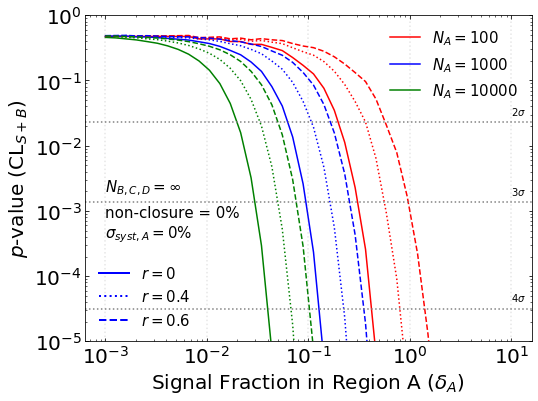

In [8]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

colors=["red","blue","green"]
mycounter = 0
for N in [100,1000,10000]:
    plt.plot(xx[N,0],yy[N,0],label="$N_A = "+str(N)+"$",color=colors[mycounter])
    mycounter+=1
    pass
mycounter = 0
for N in [100,1000,10000]:
    plt.plot(xx[N,0.4],yy[N,0.4],ls=":",color=colors[mycounter])
    mycounter+=1
    pass
mycounter = 0
for N in [100,1000,10000]:
    plt.plot(xx[N,0.6],yy[N,0.6],ls="--",color=colors[mycounter])
    mycounter+=1
    pass
plt.ylim([1e-5,1])
for i in range(2,5):
    plt.axhline(y=1.-norm.cdf(i),color="gray",ls=":")
    plt.text(10,1.3*(1.-norm.cdf(i)),r"$"+str(i)+"\sigma$")
    pass
for i in range(-1,4):
    plt.axvline(x=10**-i,color="gray",ls=":",alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Signal Fraction in Region A ($\delta_{A}$)",fontsize=20)
plt.ylabel("$p$-value (CL$_{S+B}$)",fontsize=20)
l1 = plt.legend(frameon=False,fontsize=15)
plt.gca().add_artist(l1)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='b', lw=2, label=r'$r = 0$'),
                   Line2D([0], [0], color='b', lw=2, ls=":", label=r'$r = 0.4$'),
                   Line2D([0], [0], color='b', lw=2, ls="--", label=r'$r = 0.6$')]
ax0.legend(frameon=False,fontsize=15,handles=legend_elements, loc='lower left')

plt.text(1e-3,2e-3,r"$N_{B,C,D} = \infty$",fontsize=15)
plt.text(1e-3,0.8e-3,r"non-closure = 0%",fontsize=15)
plt.text(1e-3,0.4e-3,r"$\sigma_{syst,A} = 0\%$",fontsize=15)
plt.savefig("scan_NA.pdf",bbox_inches='tight')

In [9]:
print(np.interp(0.1,xx[1000,0],yy[1000,0]))
print(np.interp(0.1,xx[1000,0.4],yy[1000,0.4]))
print(np.interp(0.1,xx[1000,0.6],yy[1000,0.6]))

0.0014850881025666302
0.03428491160815147
0.11025939421184433


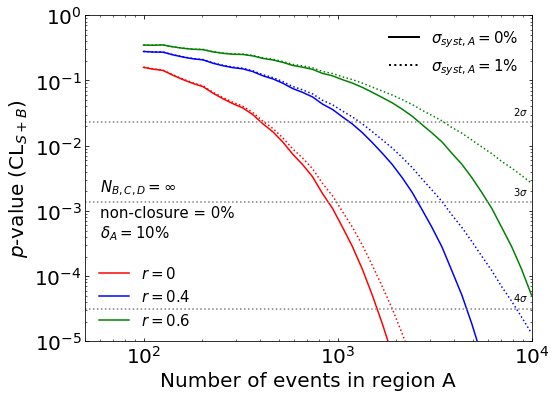

In [10]:
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.minorticks_on()

colors=["red","blue","green"]

plt.plot(xx4[0,0.0001],yy4[0,0.0001],label=r"$r = 0$",color=colors[0])
plt.plot(xx4[0.4,0.0001],yy4[0.4,0.0001],label=r"$r = 0.4$",color=colors[1])
plt.plot(xx4[0.6,0.0001],yy4[0.6,0.0001],label=r"$r = 0.6$",color=colors[2])

plt.plot(xx4[0,0.01],yy4[0,0.01],ls=":",color=colors[0])
plt.plot(xx4[0.4,0.01],yy4[0.4,0.01],ls=":",color=colors[1])
plt.plot(xx4[0.6,0.01],yy4[0.6,0.01],ls=":",color=colors[2])

plt.xlim([50,10000])
plt.ylim([1e-5,1])
for i in range(2,5):
    plt.axhline(y=1.-norm.cdf(i),color="gray",ls=":")
    plt.text(8000,1.3*(1.-norm.cdf(i)),r"$"+str(i)+"\sigma$")
    pass
for i in range(-1,4):
    plt.axvline(x=10**-i,color="gray",ls=":",alpha=0.2)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of events in region A",fontsize=20)
plt.ylabel("$p$-value (CL$_{S+B}$)",fontsize=20)
l1 = plt.legend(frameon=False,fontsize=15,loc="lower left")
plt.gca().add_artist(l1)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='black', lw=2, label=r"$\sigma_{syst,A} = 0\%$"),
                   Line2D([0], [0], color='black', lw=2, ls=":", label=r"$\sigma_{syst,A} = 1\%$")]
ax0.legend(frameon=False,fontsize=15,handles=legend_elements, loc='upper right')

plt.text(60,2e-3,r"$N_{B,C,D}=\infty$",fontsize=15)
plt.text(60,0.8e-3,r"non-closure = 0%",fontsize=15)
plt.text(60,0.4e-3,r"$\delta_A=10\%$",fontsize=15)
plt.savefig("scanN.pdf",bbox_inches='tight')